In [1]:
import numpy as np
import pandas as pd
import PIL.Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import numpy as np
import pandas as pd
from keras.models import model_from_json
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
model = Sequential() 
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu')) #3 is for type of image
model.add(MaxPooling2D(pool_size = (2, 2))) 

model.add(Conv2D(64, (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten()) 

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
model.add(Dense(units = 64, activation = 'relu')) 
model.add(Dense(units = 20, activation = 'softmax')) 

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

In [4]:
data_train = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7, 
                                         horizontal_flip = True,
                                         shear_range=0.2,
                                         height_shift_range=0.07,
                                         zoom_range=0.2) 

data_test = ImageDataGenerator(rescale = 1./255) 

In [5]:
base_train = data_train.flow_from_directory('/home/tnmsahu/Downloads/simpson_train_set',
                                            target_size = (64, 64),
                                            batch_size = 30,
                                            class_mode = 'categorical') 

base_test = data_test.flow_from_directory('/home/tnmsahu/Downloads/simpson_testset',
                                          target_size = (64, 64),
                                          batch_size = 30,
                                          class_mode = 'categorical') 


Found 18553 images belonging to 20 classes.
Found 990 images belonging to 20 classes.


In [9]:
model.fit_generator(base_train,
                    steps_per_epoch = 30,
                    epochs = 13,
                    validation_data = base_test,
                    validation_steps = 3)

Epoch 1/13
30/30 [==============================] - 4s 150ms/step - loss: 1.3912 - acc: 0.5789 - val_loss: 1.1900 - val_acc: 0.6556
Epoch 2/13
30/30 [==============================] - 4s 149ms/step - loss: 1.3940 - acc: 0.5733 - val_loss: 1.3721 - val_acc: 0.5444
Epoch 3/13
30/30 [==============================] - 4s 137ms/step - loss: 1.4005 - acc: 0.5789 - val_loss: 1.8014 - val_acc: 0.4333
Epoch 4/13
30/30 [==============================] - 4s 141ms/step - loss: 1.3805 - acc: 0.5967 - val_loss: 1.4115 - val_acc: 0.5222
Epoch 5/13
30/30 [==============================] - 4s 140ms/step - loss: 1.3454 - acc: 0.5944 - val_loss: 1.3417 - val_acc: 0.5667
Epoch 6/13
30/30 [==============================] - 4s 139ms/step - loss: 1.3772 - acc: 0.5789 - val_loss: 1.3847 - val_acc: 0.6556
Epoch 7/13
30/30 [==============================] - 4s 139ms/step - loss: 1.2894 - acc: 0.6033 - val_loss: 1.1926 - val_acc: 0.6667
Epoch 8/13
30/30 [==============================] - 5s 151ms/step - loss: 1.

In [6]:
result = []

test_image = image.load_img('/home/tnmsahu/Downloads/simpson_train_set/abraham_grampa_simpson/pic_video1_24.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

pred = model.predict_on_batch(test_image)
result.append(pred)

result = np.asarray(result)
imprime = np.array(result[0][0])
print(imprime)

[2.82782540e-31 3.94786196e-34 1.04311417e-20 9.09473774e-20
 4.97885067e-12 1.59363459e-32 9.63473888e-33 0.00000000e+00
 3.35491279e-08 4.12309701e-19 0.00000000e+00 4.51091120e-09
 0.00000000e+00 1.51274575e-27 1.78635681e-35 3.73273771e-23
 0.00000000e+00 9.82777596e-01 1.72224268e-02 6.44870026e-25]


In [7]:
model_json=model.to_json()

In [8]:
with open('model_json.json', 'w') as json_file:
    json_file.write(model_json)

In [9]:
model.save_weights('model_simpsons.h5')

In [10]:
ar= open('model_json.json', 'r')
struct = ar.read()
ar.close()

In [11]:
model = model_from_json(struct)
model.load_weights('model_simpsons.h5')
result = []

In [28]:
person = pd.read_csv('number_pic_char.csv', index_col = 0)
person.sort_values(by=['name'], inplace=True)
person.drop(['total', 'train', 'test', 'bounding_box',], axis = 1, inplace=True)
person.reset_index(drop = True, inplace=True)
person.drop([1, 5, 9, 11, 13, 14,
                  16, 17, 19, 20, 24,
                  31, 35, 39, 43, 44,
                  45], inplace=True)
person.reset_index(drop = True, inplace=True)
person.head()

,name
0,Abraham Grampa Simpson
1,Apu Nahasapeemapetilon
2,Barney Gumble
3,Bart Simpson
4,Carl Carlson


In [29]:
imagem='/home/tnmsahu/Downloads/simpson_testset/bart_simpson/bart_simpson_1.jpg'

In [30]:
result = []

test_image = image.load_img(imagem, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

pred = model.predict_on_batch(test_image)
result.append(pred)

result = np.asarray(result)
imprime = np.array(result[0][0])
imprime

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

the predicted character Bart Simpson


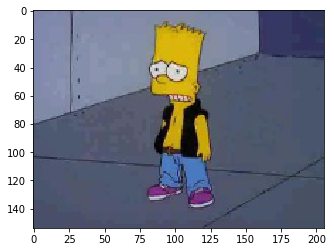

In [34]:
result_final  = imprime.argmax()
imagem = '/home/tnmsahu/Downloads/simpson_testset/bart_simpson/bart_simpson_1.jpg'
imagem = mpimg.imread(imagem)
plt.imshow(imagem)
print('the predicted character '+person.loc[result_final][0])